# **Uploads**

---

Upload necessary files

In [1]:
from google.colab import files
files.upload()

Saving data_generator.py to data_generator (3).py


{'data_generator.py': b'import random\nimport cv2\nimport numpy as np\n\nfrom imgaug import augmenters as iaa\nfrom tensorflow.keras import datasets\n\n(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()\n\ndef sometimes(aug): return iaa.Sometimes(0.5, aug)\n\nseq = iaa.Sequential([\n    iaa.Affine(\n        scale={"x": (0.8, 1), "y": (0.8, 1)},\n        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},\n        rotate=(-15, 15),\n        shear=(-5, 5),\n        cval=(0, 0),\n        mode=\'constant\'\n    )\n])\n\n\ndef crop_number(number):\n    """\n        Crops a MNIST digit to its containing bounding box with some random noise.\n    """\n    vsum = np.sum(number, axis=0)\n    vsum[vsum > 0] = 1\n    vdif = np.diff(vsum)\n    vdif[vdif > 0] = 1\n    xs = np.argwhere(vdif > 0).ravel()\n\n    random_cut1 = np.random.randint(-1, 3)\n    random_cut2 = np.random.randint(-1, 3)\n\n    try:\n        cropped_number = number[0:28, xs[0] - random_cut1:xs[1] + random_cut2]

# **Imports**

---

Import necessary libraries and set constant variables

In [0]:
%matplotlib inline
import cv2
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

from data_generator import training_generator, test_generator

NUM_CLASSES = 254 + 254 + 1
Y_ROWS = 3
CHARS_Y = ' 0123456789'
N_A = 128 # HIDDEN UNITS
INPUT_SHAPE = (28, 84, 1)

# **Utils**

---

Utils functions

In [0]:
def generate_balanced_data(no_ex_per_class=100, data_type='train'):
  classes = NUM_CLASSES * [0]
  per = 0
  X1 = []
  X2 = []
  y = []
  
  if data_type == 'train':
    generator = training_generator(batch_size=1)
  elif data_type == 'test':
    generator = test_generator(batch_size=1)
  else:
    raise Exception('Invalid data type!')
  
  while True:
    x, numbers, numbers_sum = next(generator)
    nr = '{0}+{1}'.format(numbers[0], numbers[1])
    s = str(numbers_sum[0][0])
    
    if classes[int(s)] < no_ex_per_class:
      classes[int(s)] += 1
      X1.append(np.expand_dims(x[0, 0], axis=-1))
      X2.append(np.expand_dims(x[0, 1], axis=-1))
      y.append(s)
      
      if int((sum(classes) * 100) / (NUM_CLASSES * no_ex_per_class)) > per:
        per = int((sum(classes) * 100) / (NUM_CLASSES * no_ex_per_class))
        print('--{0}%/100%--'.format(per))

#     if (sum(classes) == NUM_CLASSES * no_ex_per_class):
#       break
    if int((sum(classes) * 100) / (NUM_CLASSES * no_ex_per_class)) >= 90:
      break
    
  X1 = np.array(X1)
  X2 = np.array(X2)
  y = np.array(y)

  return X1, X2, y

def show_img(img, label, predicted_label=None):
  plt.figure()
  plt.imshow(img, cmap=plt.get_cmap('gray'))
  plt.colorbar()
  plt.grid(False)
  if predicted_label is None:
    plt.title('True label: {0}'.format(label))
  else:
    plt.title('True label: {0} - Predicted label: {1}'.format(label, predicted_label))

def encode_y_str(s):
  s = ' ' * (Y_ROWS - len(s)) + s
  y = np.zeros((Y_ROWS, len(CHARS_Y)))
  
  for i in range(Y_ROWS):
    y[i, CHARS_Y.find(s[i])] = 1
    
  return y

def decode_y_str(y):
  s = ''
  for i in range(Y_ROWS):
    pos = np.argmax(y[i])
    if pos == 0:
      continue
      
    s += CHARS_Y[pos]
    
  return s

def encode_y(y):
  y_new = []
  for i in range(y.shape[0]):
    y_new.append(encode_y_str(y[i]))
  y_new = np.array(y_new)
    
  y_time_step = []
  y_time_step.append(y_new[:, 0, :])
  y_time_step.append(y_new[:, 1, :])
  y_time_step.append(y_new[:, 2, :])
    
  return y_new, np.array(y_time_step)

Generating the data

In [4]:
X1_train, X2_train, y_train = generate_balanced_data(no_ex_per_class=100, data_type='train')
X1_test, X2_test, y_test = generate_balanced_data(no_ex_per_class=10, data_type='test')

y_train_encoded, y_train_encoded_time_step = encode_y(y_train)
y_test_encoded, y_test_encoded_time_step = encode_y(y_test)

--1%/100%--
--2%/100%--
--3%/100%--
--4%/100%--
--5%/100%--
--6%/100%--
--7%/100%--
--8%/100%--
--9%/100%--
--10%/100%--
--11%/100%--
--12%/100%--
--13%/100%--
--14%/100%--
--15%/100%--
--16%/100%--
--17%/100%--
--18%/100%--
--19%/100%--
--20%/100%--
--21%/100%--
--22%/100%--
--23%/100%--
--24%/100%--
--25%/100%--
--26%/100%--
--27%/100%--
--28%/100%--
--29%/100%--
--30%/100%--
--31%/100%--
--32%/100%--
--33%/100%--
--34%/100%--
--35%/100%--
--36%/100%--
--37%/100%--
--38%/100%--
--39%/100%--
--40%/100%--
--41%/100%--
--42%/100%--
--43%/100%--
--44%/100%--
--45%/100%--
--46%/100%--
--47%/100%--
--48%/100%--
--49%/100%--
--50%/100%--
--51%/100%--
--52%/100%--
--53%/100%--
--54%/100%--
--55%/100%--
--56%/100%--
--57%/100%--
--58%/100%--
--59%/100%--
--60%/100%--
--61%/100%--
--62%/100%--
--63%/100%--
--64%/100%--
--65%/100%--
--66%/100%--
--67%/100%--
--68%/100%--
--69%/100%--
--70%/100%--
--71%/100%--
--72%/100%--
--73%/100%--
--74%/100%--
--75%/100%--
--76%/100%--
--77%/100%--
--78%/10

I used the same two architecture from Classification and Addition tasks. But here, the encoder was replaced by the siamese convolutional neural network. Here is the workflow: I pass the two input images through the convolutional neural network one by one, after I that, I take the outputs from the images and I sum them, and the output will be the input of the decoder which is the same decoder from the Addition task.

Training

In [0]:
LSTM_cell_decoder = tf.keras.layers.LSTM(N_A, return_state=True)
densor = tf.keras.layers.Dense(len(CHARS_Y), activation=tf.nn.softmax)
reshapor_y = tf.keras.layers.Reshape((1, 11))

X1_train_pre = X1_train / 255
X2_train_pre = X2_train / 255
X1_test_pre = X1_test / 255
X2_test_pre = X2_test / 255

left_input = tf.keras.layers.Input(INPUT_SHAPE)
right_input = tf.keras.layers.Input(INPUT_SHAPE)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16,
                           kernel_size=3,
                           activation=tf.nn.relu,
                           input_shape=INPUT_SHAPE),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.50),
    tf.keras.layers.Dense(units=N_A,
             activation=tf.nn.relu),
])

encoded_l = model(left_input)
encoded_r = model(right_input)

both = tf.keras.layers.Lambda(lambda x: x[0] + x[1])([encoded_l, encoded_r])

# decoder
c0 = tf.keras.layers.Input(shape=(N_A,))
c = c0

a = both

y_init = tf.keras.layers.Input(shape=(1, len(CHARS_Y)))
Y = tf.keras.layers.Input(shape=(Y_ROWS, len(CHARS_Y)))

outputs = []

for t in range(Y_ROWS):
  if t == 0:
    y = tf.keras.layers.Lambda(lambda y: y[:, 0, :])(y_init)
  else:
    y = tf.keras.layers.Lambda(lambda y: y[:, t - 1, :])(Y)
  y = reshapor_y(y)
    
  a, _, c = LSTM_cell_decoder(y, initial_state=[a, c])
  
  out = densor(a)  
  outputs.append(out)
    
model_final = tf.keras.Model(inputs=[left_input, right_input, c0, y_init, Y], outputs=outputs)

In [0]:
opt = tf.keras.optimizers.Adam()
model_final.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

m = X1_train_pre.shape[0]
c0 = np.zeros((m, N_A))
y_init = np.zeros((m, 1, len(CHARS_Y)))

In [11]:
print('The model architecture:')
model_final.summary()

The model architecture:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 1, 11)        0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 28, 84, 1)    0                                            
__________________________________________________________________________________________________
input_7 (InputLayer)            (None, 28, 84, 1)    0                                            
__________________________________________________________________________________________________
lambda_5 (Lambda)               (None, 11)           0           input_9[0][0]                    
_____________________________________________________________________________________

In [12]:
model_final.fit([X1_train_pre, X2_train_pre, c0, y_init, y_train_encoded], list(y_train_encoded_time_step), epochs=50)

Epoch 1/50
45810/45810 [==============================] - 39s 860us/step - loss: 5.2878 - dense_2_loss: 2.3141 - dense_2_acc: 0.6512 - dense_2_acc_1: 0.1489 - dense_2_acc_2: 0.1023
Epoch 2/50
45810/45810 [==============================] - 38s 821us/step - loss: 4.7788 - dense_2_loss: 2.3041 - dense_2_acc: 0.7720 - dense_2_acc_1: 0.2329 - dense_2_acc_2: 0.1069
Epoch 3/50
45810/45810 [==============================] - 38s 822us/step - loss: 4.5141 - dense_2_loss: 2.2971 - dense_2_acc: 0.8164 - dense_2_acc_1: 0.2883 - dense_2_acc_2: 0.1141
Epoch 4/50
45810/45810 [==============================] - 38s 821us/step - loss: 4.3170 - dense_2_loss: 2.2889 - dense_2_acc: 0.8411 - dense_2_acc_1: 0.3404 - dense_2_acc_2: 0.1186
Epoch 5/50
45810/45810 [==============================] - 38s 821us/step - loss: 4.1552 - dense_2_loss: 2.2801 - dense_2_acc: 0.8568 - dense_2_acc_1: 0.3857 - dense_2_acc_2: 0.1244
Epoch 6/50
45810/45810 [==============================] - 38s 831us/step - loss: 4.0144 - dense

Predicting

In [0]:
left_input_ = tf.keras.layers.Input(INPUT_SHAPE)
right_input_ = tf.keras.layers.Input(INPUT_SHAPE)

encoded_l_ = model(left_input_)
encoded_r_ = model(right_input_)

both_ = tf.keras.layers.Lambda(lambda x: x[0] + x[1])([encoded_l_, encoded_r_])
# both_ = tf.keras.layers.concatenate([encoded_l_, encoded_r_])

#decoder
c0_ = tf.keras.layers.Input(shape=(N_A,))
c_ = c0_

a_ = both_

xx_ = tf.keras.layers.Input(shape=(1, len(CHARS_Y)))
inp = xx_

outputs_ = []

for t in range(Y_ROWS):
  y_ = tf.keras.layers.Lambda(lambda y: y[:, 0, :])(inp)
  
  y_ = reshapor_y(y_)
    
  a_, _, c_ = LSTM_cell_decoder(y_, initial_state=[a_, c_])
  
  out_ = densor(a_)
  
  inp = reshapor_y(out_)
  outputs_.append(inp)
  
model_final_ = tf.keras.Model(inputs=[left_input_, right_input_, c0_, xx_], outputs=outputs_)

In [18]:
m_pos = 1
c0 = np.zeros((m_pos, N_A))
xx = np.zeros((m_pos, 1, len(CHARS_Y)))

y_pred = []
for pos in range(X1_test_pre.shape[0]):
  p = model_final_.predict([X1_test_pre[pos:pos+m_pos, :, :, :], X2_test_pre[pos:pos+m_pos, :, :, :], c0, xx])
  y_pred.append(decode_y_str(p))
    
acc = accuracy_score(y_test, y_pred)
print('The accuracy on the test set: {0}'.format(acc))

The accuracy on the test set: 0.6612093429382231


Print some good examples, pair of two images are summed

Good examples:


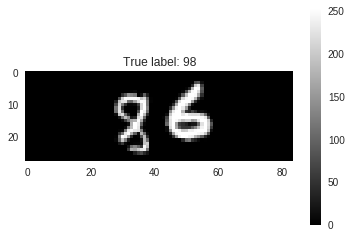

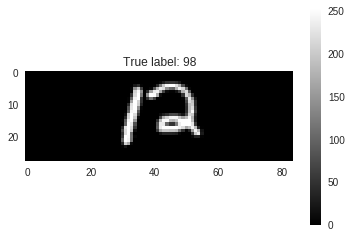

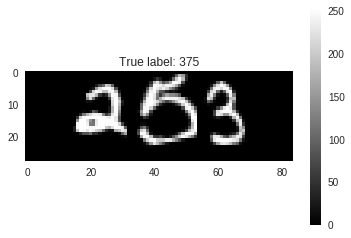

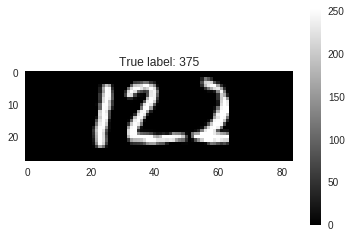

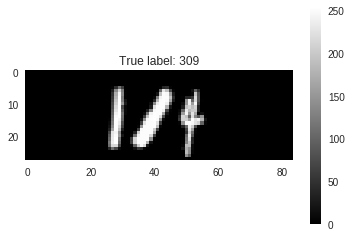

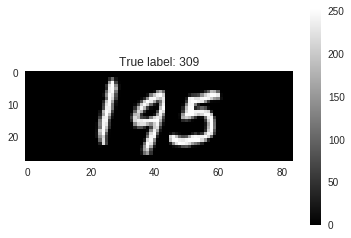

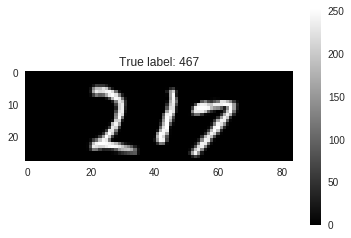

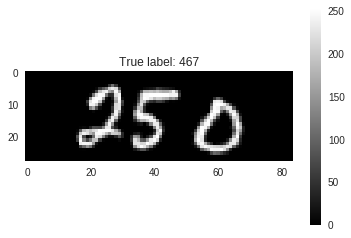

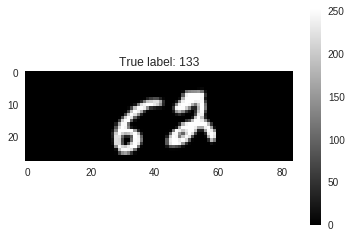

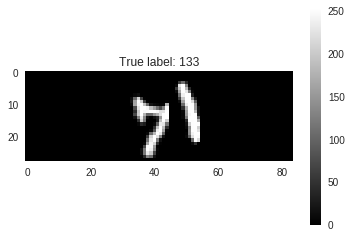

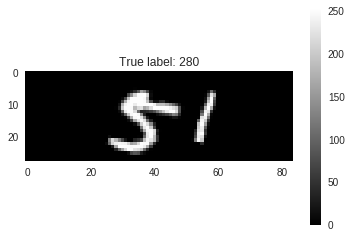

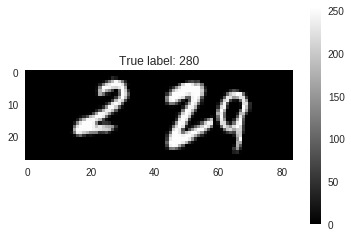

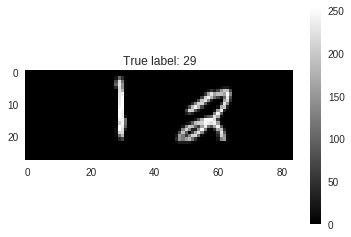

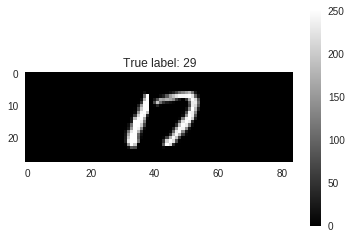

In [21]:
print('Good examples:')
nrs = np.random.randint(0, len(y_test), size=10)
for nr in nrs:
  if y_test[nr] == y_pred[nr]:
    show_img(X1_test[nr, :, :, 0], y_test[nr])
    show_img(X2_test[nr, :, :, 0], y_test[nr])